# SCC0275: Introdução a Ciência de Dados - 2o Semestre de 2021
# SCC0275 - Exercício 2

### Profa. Roseli A. F. Romero

### Monitor: Kenzo Sakiyama

Nro do grupo:

Alunos:


1.   Stefan Taiguara Couperus Leal 10414866



## Dados unidimensionais
 
Suponha dois conjuntos de dados, que representam as notas finais em uma dada disciplina de duas salas com 100 alunos. Os dados foram armazenados nos arquivos "notas_salas01.txt" e "notas_salas02.txt". 

Imagine que uma pessoa deseje comparar o desempenho das salas de aula. Considera-se que, **quanto mais alunos foram aprovados, melhor o desempenho da sala**. Suponha que para ser aprovado, um aluno deve ter nota maior que 50. 

Como medida inicial de desempenho, essa pessoa calculou a média dos dados através do código abaixo:

In [23]:
import numpy as np
import pandas as pd
from scipy import stats

#//
from datetime import datetime, date
import matplotlib.pyplot as plt

In [24]:
salas = []
salas.append(np.loadtxt("notas_sala01.txt"))
salas.append(np.loadtxt("notas_sala02.txt"))

for i in range(0,2):
    print("--- Sala: %d ---" % (i+1))
    print("Média: %f" % np.mean(salas[i]))        

--- Sala: 1 ---
Média: 60.184709
--- Sala: 2 ---
Média: 55.184195


**Com base na média, a pessoa concluiu que a sala 1 obteve um melhor desempenho que a sala 2.**

### Questão 01. 
Demonstre o porquê dessa conclusão estar equivocada.
   - Sugestão: Transforme as estruturas `salas[0]` e `salas[1]` em estruturas do tipo `DataFrame` da biblioteca **pandas** e utilize as funções de histograma e/ou boxplot.

-- Sala: 0 ---


<AxesSubplot:ylabel='Frequency'>

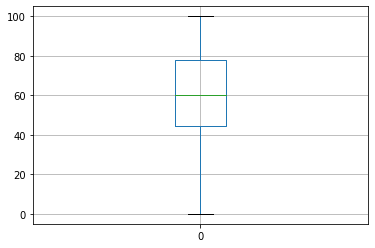

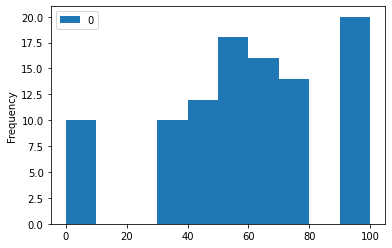

In [25]:
# Seu codigo aqui
salas_0 = pd.DataFrame(salas[0])
salas_1 = pd.DataFrame(salas[1])

print("-- Sala: 0 ---")
salas_0.boxplot()
salas_0.plot.hist()

-- Sala: 1 ---


<AxesSubplot:ylabel='Frequency'>

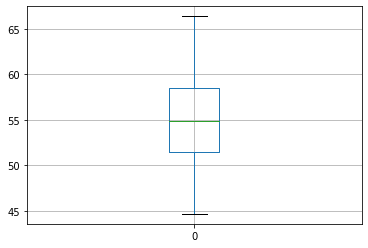

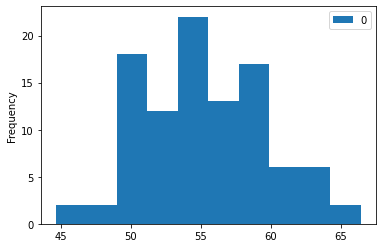

In [26]:
print("-- Sala: 1 ---")

salas_1.boxplot()
salas_1.plot.hist()


# Questão 02.
Calcule o número de aprovados em cada uma das salas.

In [27]:
def num_alunos_aprovados(notas, media=50):
    notas = np.array(notas)
    aprovados = 0
    for nota in notas:
        if (nota >= media):
            aprovados +=1
    return aprovados
num_alunos_aprovados(salas_0)

68

### Base Futebol

Suponha que uma emissora de televisão te contratou para analisar o perfil dos jogadores do futebol europeu para que os narradores possam dizer estatísticas sobre eles durante os jogos.

Os dados estão numa planilha chamada `players_sampled.csv`, onde cada linha contém os dados de um jogador e cada coluna possui um atributo. Essa base foi adaptada do site de competições de ciência de dados chamado [Kaggle](*https*://www.kaggle.com/hugomathien/soccer).

In [28]:
# Carregando a base
df = pd.read_csv('players_sampled.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  350 non-null    int64  
 1   player_api_id       350 non-null    int64  
 2   player_name         350 non-null    object 
 3   player_fifa_api_id  350 non-null    int64  
 4   birthday            350 non-null    object 
 5   height              350 non-null    float64
 6   weight              350 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 19.3+ KB


In [29]:
df.head(10)


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,193.04,176
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,170.18,150
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,182.88,179
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,175.26,159
5,6259,67360,Luca Radice,221640,1987-04-09 00:00:00,180.34,154
6,3485,37753,Francis Dickoh,130933,1982-12-13 00:00:00,187.96,187
7,87,495841,Adalberto Penaranda,231638,1997-05-31 00:00:00,182.88,172
8,10862,67941,Xavier Chen,158260,1983-10-05 00:00:00,175.26,152
9,3142,199916,Ezequiel Adrian Cirigliano,199666,1992-01-24 00:00:00,172.72,157


### Questão 03
Para cada atributo da base, identifique quais são categoricos/nominais, ordinais, intervalares e racionais. (Não precisa ser em código)


**Categoricos:** player_api_id, id, player_fifa_api_id, player_name

**Ordinais:** 

**Intervalares:** birthday

**Racionais:** height, weight

### Questão 4

Formule 3 hipóteses sobre a base ou seus atributos que possam ser verificadas com os conceitos apresentados na disciplina.

Ex: O atributo altura tem mais valores abaixo da média (obliquidade negativa)


-    O atributo altura apresenta um achatamento da função de distribuição (Curtose negativa)

-   O atributo peso tem valores bem distribuidos na média (Obliquidade quase nula)

-  O atributo idade apresenta um achatamento da função de distribuição (Curtose negativa)




### Questão 5

Verifique se suas hipóteses são verdadeiras

In [30]:
# print(f"Mean: { df.height.mean()}")
# print(f"Variance: { df.height.var()}")
# print(f"Obliquidade: { df.height.skew()}") 
# print(f"Curtose: { df.height.kurtosis()}")
# A biblioteca calendar ou a datetime podem te ajudar
def calc_idade(df):
    birthday = pd.to_datetime(df.birthday)
    df['age'] =   datetime.now().year - birthday.dt.year
    return df



def h1(df):
    print("-- h1 ---")
    print(f"Curtose: { df.height.kurtosis()}") # Os dados estão mais achatados


def h2(df):
    print("\n-- h2---")
    print(f"Obliquidade: { df.weight.skew()}") 

def h3(df):
    print("\n-- h3---")
    calc_idade(df)
    print(f"Curtose: { df.age.kurtosis()}")

h1(df)
h2(df)
h3(df)


-- h1 ---
Curtose: -0.4321787984727954

-- h2---
Obliquidade: 0.03027696608290736

-- h3---
Curtose: -0.3580084552546188


### Questão 6
- Os pesos dos jogadores foram dados em libras. Transforme os pesos dos jogadores para quilos e substitua o valor antigo da coluna no DataFrame. Dica: 1 lb = 0.45359237 kg

- Crie um novo atributo chamado "age" (idade) a partir da data de nascimento do jogador. Este atributo deve ser considerado nas próximas questões. A idade deve ser um número inteiro. Bib datetime

In [31]:
def lb_para_kg(df):
    df.weight = df.weight * 0.45359237

lb_para_kg(df)   

In [32]:
# A biblioteca calendar ou a datetime podem te ajudar
def calc_idade(df):
    birthday = pd.to_datetime(df.birthday)
    df['age'] =   datetime.now().year - birthday.dt.year
    return df

df = calc_idade(df)
df


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,193.04,79.832257,33
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,170.18,68.038855,29
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,182.88,81.193034,35
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,69.853225,42
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,175.26,72.121187,35
...,...,...,...,...,...,...,...,...
345,10199,7627,Thierno Bah,45269,1982-10-05 00:00:00,175.26,68.038855,39
346,1216,246330,Benjamin Morel,202753,1987-06-10 00:00:00,180.34,69.853225,34
347,4262,33793,Hugo Alcantara,14491,1979-07-28 00:00:00,190.50,84.821773,42
348,5886,173699,Koro Kone,207538,1989-07-05 00:00:00,177.80,74.842741,32


### Questão 7
Implemente a função que calcule o percetil de determinado atributo. (Atenção: As bibliotecas Numpy/Pandas possuem a função *quantile* você não deve usá-la em sua função). Os resultados também podem variar dependendo da implementação. Tente seguir a definição dos slides. 

In [33]:
def percentile(df, nome_attr, pct):
    '''
    Parameters
    - df: Dataframe com a base
    - attr_name: Nome do atributo que queremos utilizar para computar o percentil
    - pct: Percentil. Um número entre 0 e 1.
    '''
    q1 = np.ceil(pct * len(df) + 1. / 2.) 
    values = df[nome_attr].sort_values()
    return list(values)[int(q1)]

### Questão 08
Utilizando sua função, calcule a mediana, 1º quartil, 3º quartil do atributo altura.

**Sugestão:** Utilize o método describe do pandas (pra verificação)

In [34]:
print(f"Mediana: {df.height.median()}")
print(f"1º quartil: {percentile(df, 'height', 0.25)}")
print(f"3º quartil: {percentile(df, 'height', 0.75)}")

Mediana: 182.88
1º quartil: 177.8
3º quartil: 185.42


# Questão 09

Calcule os quatro momentos (média, variância, obliquidade e achatamento) dos atributos onde essas métricas fazem sentido.

  - Dica: Utilize as bibliotecas **numpy** para média (mean) e variância (variance) e **Scipy.stats** para obliquidade (skew) e achatamento (kurtosis).

In [35]:
def quatro_momentos(df, nome_attr):
    print(f"Mean: { df[nome_attr].mean()}")
    print(f"Variance: { df[nome_attr].var()}")
    print(f"Obliquidade: { df[nome_attr].skew()}") 
    print(f"Curtose: { df[nome_attr].kurtosis()}")

quatro_momentos(df, "age")

Mean: 34.58
Variance: 26.765787965616045
Obliquidade: 0.29936479489165635
Curtose: -0.3580084552546188


### Questão 10

- Calcule o histograma e o boxplot dos atributos altura, peso e idade.
- A distribuição dos atributos possui curvatura para algum lado ou são centrados?
- A partir do Boxplot, verifique se os atributos tem outliers e justifique.

In [36]:
def hist(df, nome_attr): # Não precisa fazer a função? Somente usar a que já vem pronta
                         # Verificar o método de boxplot do pandas
    plt.title(str(nome_attr))
    plt.grid()
    plt.hist(df[nome_attr])
    plt.show()


In [37]:
def boxplot(df, nome_attr):
    plt.title(str(nome_attr))
    plt.boxplot(df[nome_attr])
    plt.grid()
    plt.show()


#### Altura 

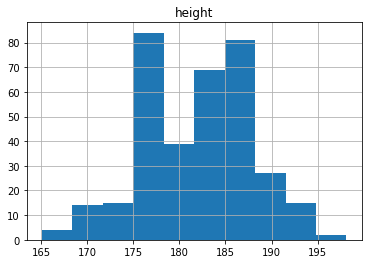

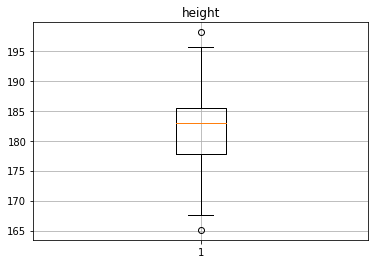

O atributo altura tem mais valores abaixo da média


In [38]:
hist(df, "height")
boxplot(df, "height")

print("O atributo altura tem mais valores abaixo da média")

#### Peso

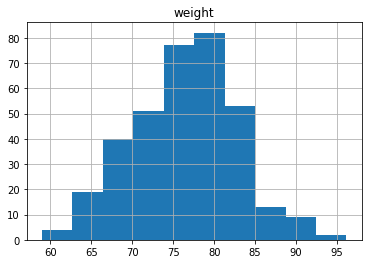

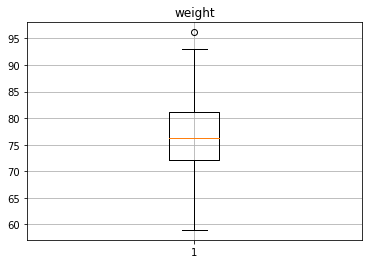

O atributo se encontra bem distribuido ao longo da média


In [39]:
hist(df, "weight")
boxplot(df, "weight")
print("O atributo se encontra bem distribuido ao longo da média")

#### Idade

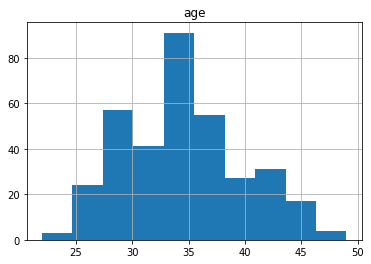

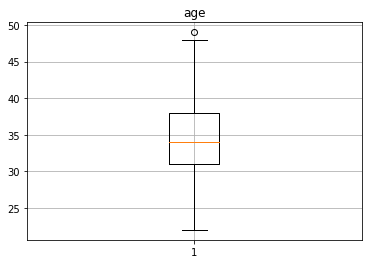

O atributo idade tem mais valores abaixo da média


In [40]:
hist(df, "age")
boxplot(df, "age")
print("O atributo idade tem mais valores abaixo da média")